In [28]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mticker

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [30]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [31]:
chdir = True

In [32]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [33]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

# Service chain configuration

In [34]:
from IPython.display import IFrame
IFrame("../assets/tree.pdf", width=600, height=420)

In [35]:
# Metadata for specific SFC configurations
exp_ls = "exp1" 
exp_rs = "exp-4-1-1"
vnfs = ["flow_tracker.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv"]

# Load stimulus experiments

## High-level KPIs:


In [36]:
current_dir = os.getcwd()

exp_ls = "load_stimulus_global.csv"
file_path = os.path.abspath(os.path.join("..\\tree\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 177
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1780 non-null   float64
 1   output_rate                         1780 non-null   float64
 2   latency                             1780 non-null   float64
 3   flow_tracker_instructions           1780 non-null   float64
 4   nf_router_instructions              1780 non-null   float64
 5   ndpi_stats_instructions             1780 non-null   float64
 6   payload_scan_instructions           1780 non-null   float64
 7   flow_tracker_branches               1780 non-null   float64
 8   nf_router_branches                  1780 non-null   float64
 9   ndpi_stats_branches                 1780 non-null   float64
 10  payload_scan_branches               1780 non-null   float64
 11  flow_tracker_branch-misses          1780 non

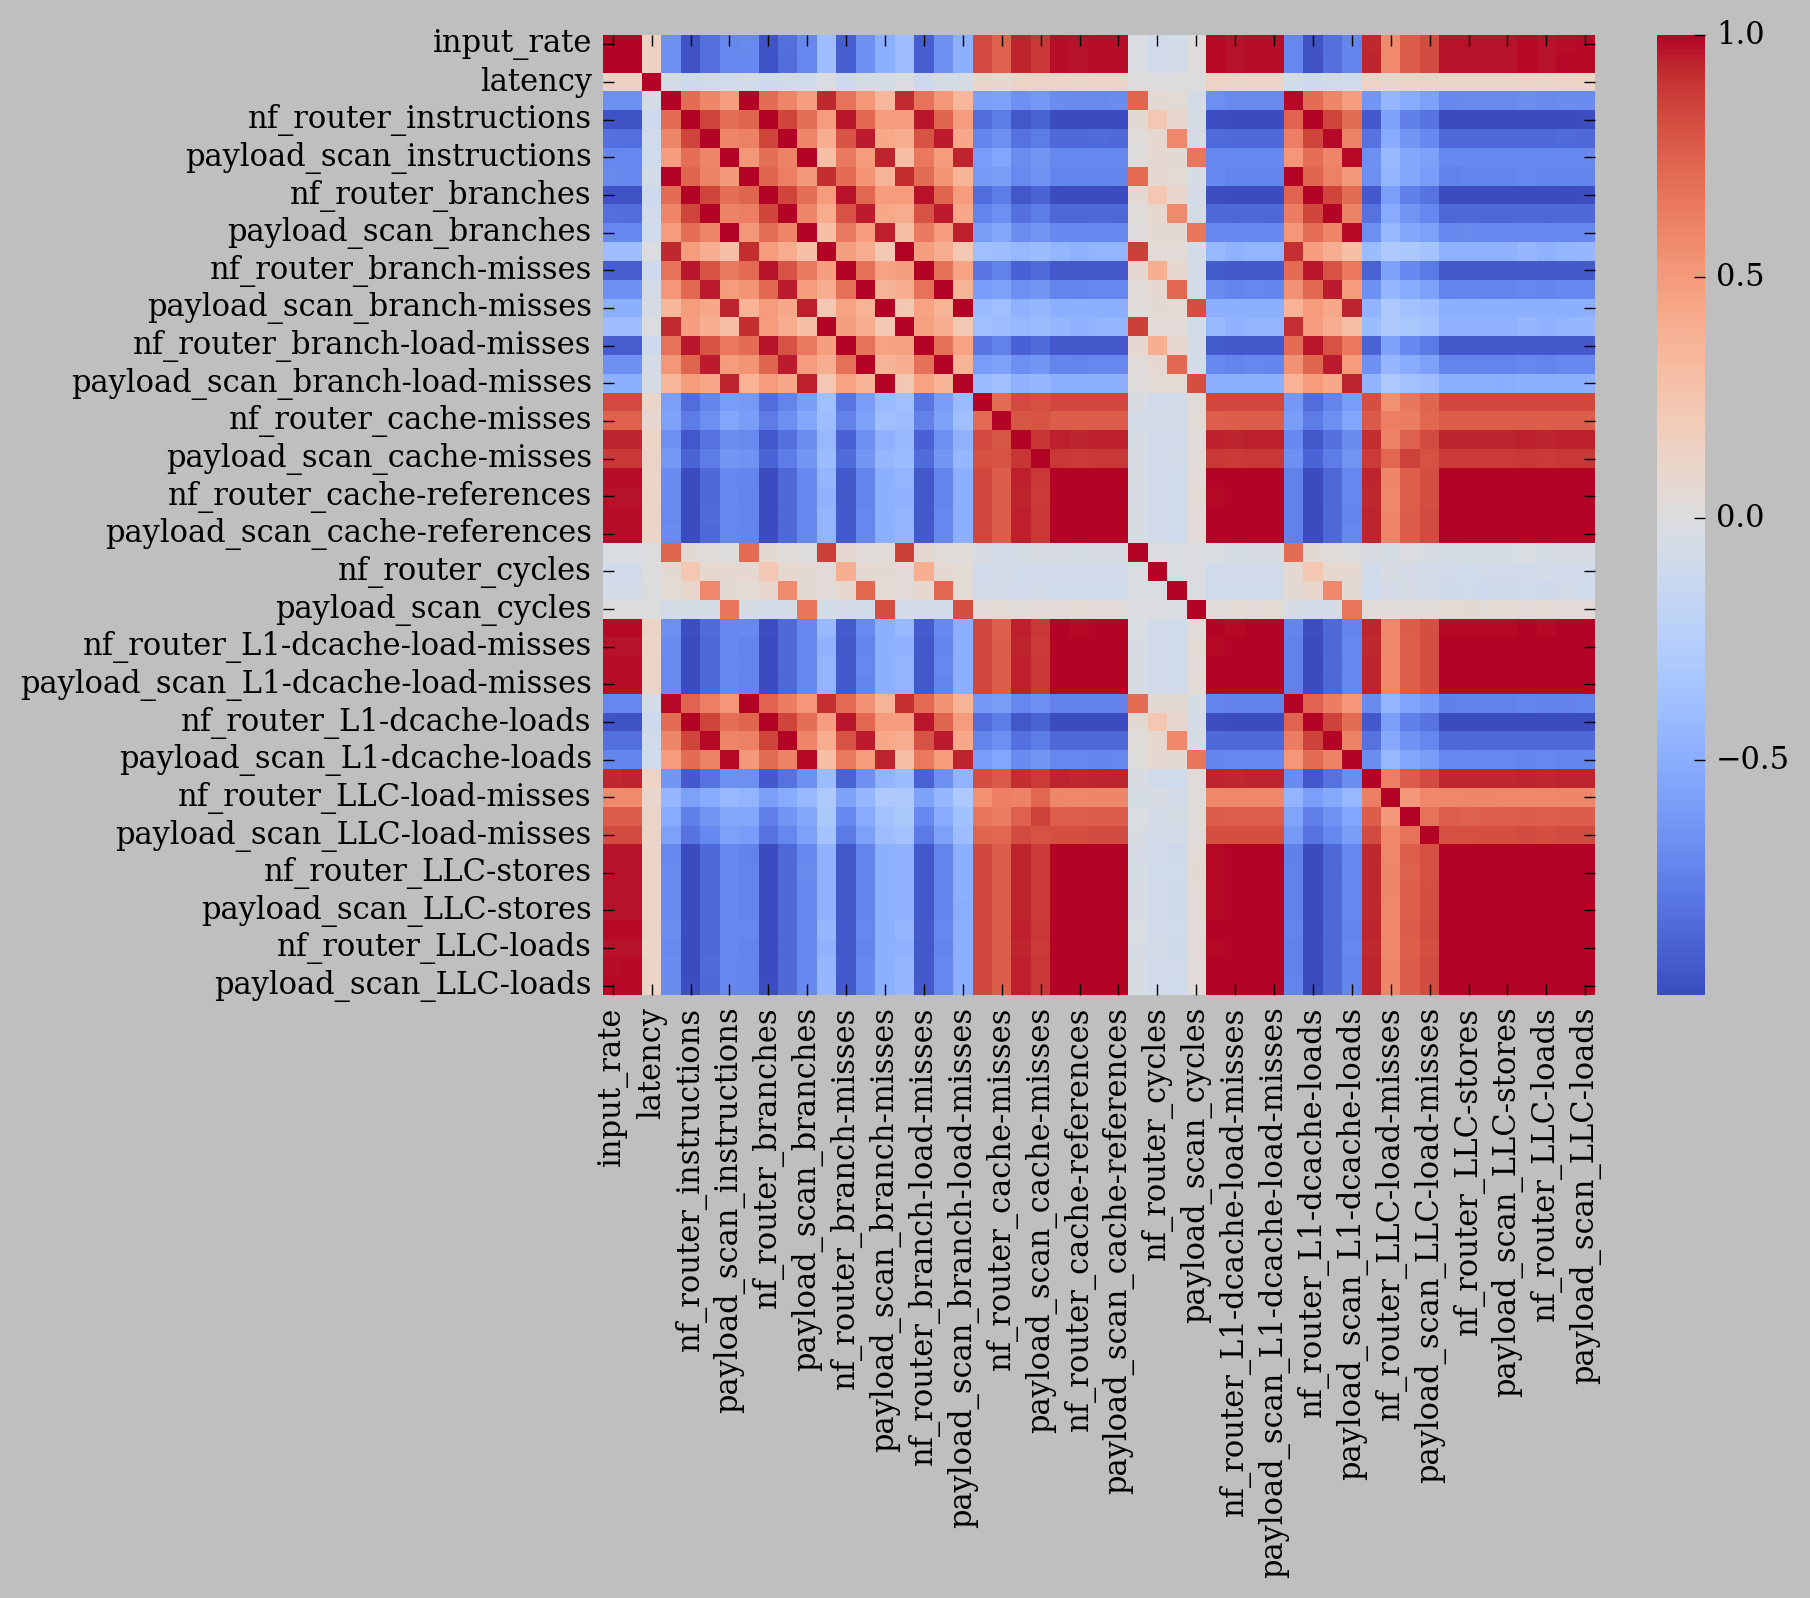

In [37]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [38]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and payload_scan_LLC-loads: 0.99
Correlation between output_rate and flow_tracker_L1-dcache-load-misses: 0.99
Correlation between output_rate and flow_tracker_LLC-loads: 0.99
Correlation between output_rate and ndpi_stats_LLC-loads: 0.99
Correlation between output_rate and payload_scan_cache-references: 0.98
Correlation between output_rate and ndpi_stats_cache-references: 0.98
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.98
Correlation between output_rate and flow_tracker_cache-references: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.98
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.97
Correlation between output_rate and nf_router_cache-references: 0.97
Correlation between output_rate and flow_tracker_LLC-stores: 0.97
Correlation between output_ra

In [39]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")


Correlation between latency and flow_tracker_LLC-load-misses: 0.14
Correlation between latency and ndpi_stats_cache-misses: 0.13
Correlation between latency and flow_tracker_L1-dcache-load-misses: 0.12
Correlation between latency and payload_scan_LLC-loads: 0.12
Correlation between latency and payload_scan_cache-misses: 0.12
Correlation between latency and ndpi_stats_LLC-loads: 0.12
Correlation between latency and flow_tracker_LLC-loads: 0.12
Correlation between latency and payload_scan_cache-references: 0.12
Correlation between latency and ndpi_stats_cache-references: 0.12
Correlation between latency and flow_tracker_cache-references: 0.12
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.12
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.12
Correlation between latency and payload_scan_LLC-load-misses: 0.12
Correlation between latency and ndpi_stats_LLC-load-misses: 0.12
Correlation between latency and nf_router_cache-references: 0.11
Correlatio

<Axes: >

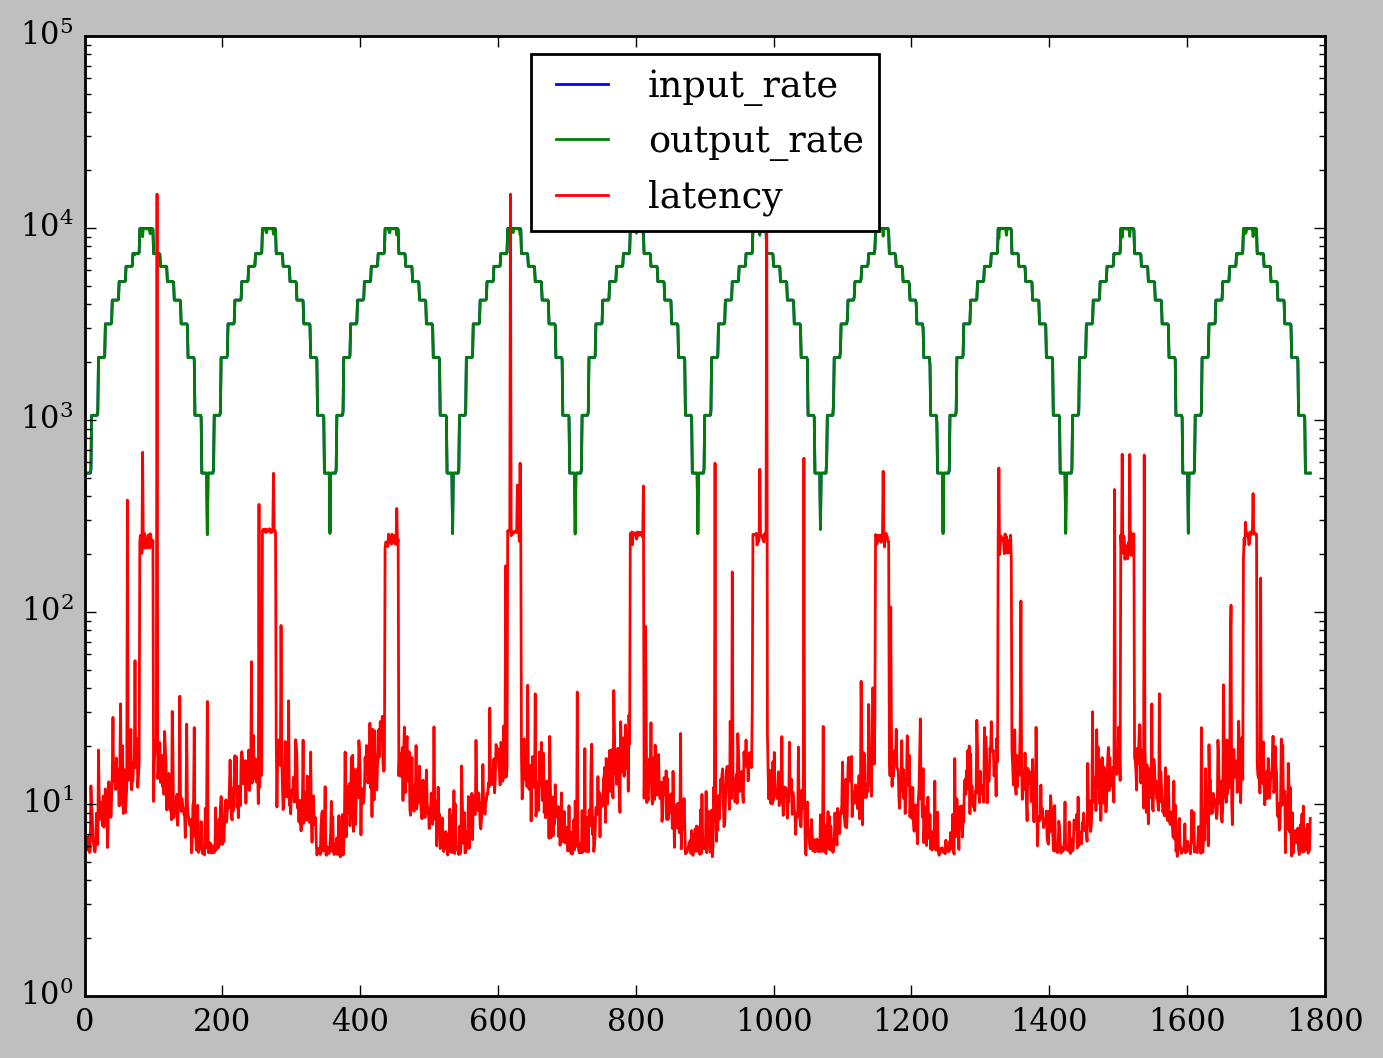

In [40]:
data = data.reset_index(drop=True)
data
data.iloc[:, :3].plot(logy=True)

In [41]:
# linear regression
from sklearn.linear_model import LinearRegression

def linear_regression(a, b):
    # Convert the input lists to numpy arrays
    x = np.array(a)
    y = np.array(b)

    # Reshape the arrays to be 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    # Use the model to make predictions
    y_pred = model.predict(x)

    # Return the predicted values
    return y_pred,r2

In [42]:
# polynomial regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def polynomial_regression(x, y, degree):
    
    # Reshape the arrays to be 2D
    
    x = np.array(x)
    y = np.array(y)

    # Transform the input data into a matrix of polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    # model score
    r2 = r2_score(y, y_pred)
    # Return the coefficients of the polynomial equation
    return model.coef_, y_pred,r2

## Co-relationship between 'input rate' and 'instructions'

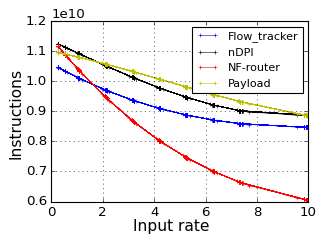

In [44]:
# compare each VNF instruction and rate

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_instructions'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_instructions'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_instructions'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_instructions'],3)

# flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')



ax.legend(loc="upper right", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'Instructions', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')


# Adjust subplot parameters manually
left_margin = 0.2  # Adjust as needed
right_margin = 0.9
bottom_margin = 0.15
top_margin = 0.9
plt.subplots_adjust(left=left_margin, right=right_margin, bottom=bottom_margin, top=top_margin, wspace=0.3, hspace=0.4)

#save figure
plt.tight_layout()
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'instructions_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


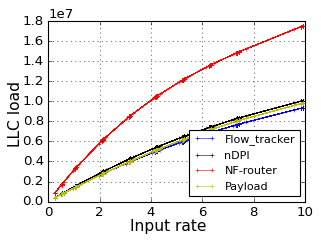

In [45]:
# compare different VNF LLC-LOAD and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_LLC-loads'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_LLC-loads'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_LLC-loads'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_LLC-loads'],3)

# Flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


ax.legend(loc="lower right", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0, 0.5, 'LLC load', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'LLC_load_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


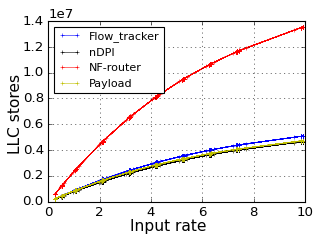

In [46]:
# compare different VNF LLC-LOAD and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_LLC-stores'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_LLC-stores'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_LLC-stores'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_LLC-stores'],3)

# Flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0, 0.5, 'LLC stores', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'LLC_store_dag-2.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


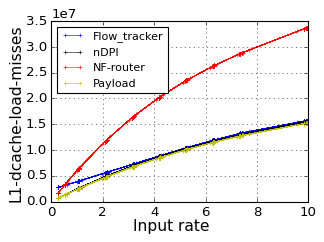

In [47]:
# compare different VNF LLC-LOAD and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_L1-dcache-load-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_L1-dcache-load-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_L1-dcache-load-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_L1-dcache-load-misses'],3)


# Flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')



ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(-0.01, 0.5, 'L1-dcache-load-misses', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'L1-dcache-load-misses_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


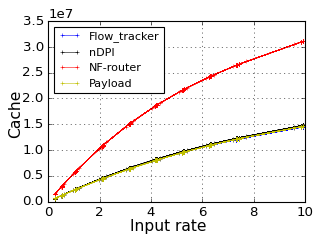

In [48]:
# compare different VNF cache-reference and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_cache-references'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_cache-references'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cache-references'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cache-references'],3)

# flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label="Flow_tracker")

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')

ax.legend(loc="upper left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0, 0.5, 'Cache', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cache-references_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

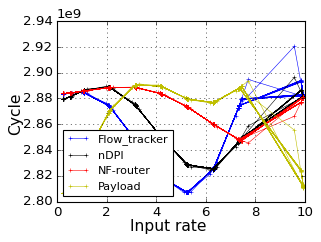

In [49]:
# compare different VNFs cycles and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_cycles'],5)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_cycles'],5)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cycles'],5)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cycles'],5)

# flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')



ax.legend(loc="lower left", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0, 0.5, 'Cycle', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cycles1_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

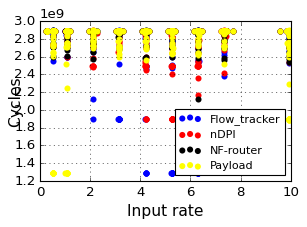

In [50]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')

# Use 'tab10' color map for distinct colors
color_map = plt.get_cmap('tab10')

# Plot the data points for each VNF
ax.scatter(data['input_rate'] / 1000, data['flow_tracker_cycles'], c='blue', label='Flow_tracker', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['ndpi_stats_cycles'], c='red', label='nDPI', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['nf_router_cycles'], c='black', label='NF-router', marker='o', s=30, linewidths=0)
ax.scatter(data['input_rate'] / 1000, data['payload_scan_cycles'], c='yellow', label='Payload', marker='o', s=30, linewidths=0)

ax.legend(loc="lower right", fontsize=10)

ax.set_xlabel("Input rate", fontsize=14)
ax.set_ylabel("Cycles", labelpad=-8, fontsize=14)
ax.set_facecolor('white')
plt.grid()
ax.set_xlim(0, 10)

# Save the figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cycles_tree.pdf')
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


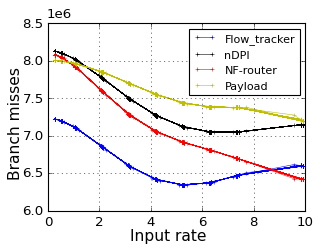

In [51]:
# compare different VNF branch-misses and rate
import matplotlib.ticker as mticker

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_branch-misses'],5)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['flow_tracker_branch-misses'],5)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_branch-misses'],5)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_branch-misses'],5)

# flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/1000000:.1f}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e6', size='12', ha='left', va='top')



ax.legend(loc="upper right", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='14', ha='center')
fig.text(0, 0.5, 'Branch misses', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'branch-misses_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


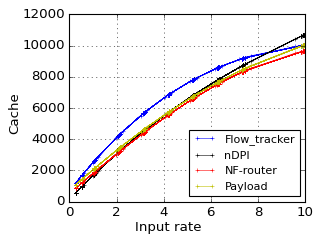

In [52]:
# compare different VNF cache-misses and rate


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')


# linear regression
# linear regression
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['flow_tracker_cache-misses'],3)
coef,y_pred_f,r2_f = polynomial_regression(list(data['input_rate']), data['nf_router_cache-misses'],3)
coef,y_pred_ndpi,r2_ndpi = polynomial_regression(list(data['input_rate']), data['ndpi_stats_cache-misses'],3)
coef,y_pred_pl,r2_pl = polynomial_regression(list(data['input_rate']), data['payload_scan_cache-misses'],3)

# flow_tracker
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=0.5, marker = '+', markersize=3, label='Flow_tracker')

# ndpi
l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=0.5, marker = '+',markersize=3, label='nDPI')

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=0.5, marker = '+', markersize=3,label='NF-router')

#payload
l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='y', linewidth=0.5, marker = '+', markersize=3, label='Payload')


ax.legend(loc="lower right", fontsize=10)

fig.text(0.5, 0.01, "Input rate", size='12', ha='center')
fig.text(0, 0.5, 'Cache', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'cache-misses_tree.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Principal component analysis

89000


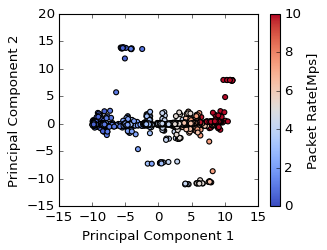

(1780, 2)
Eigenvectors:
 [[ 0.2  0.  -0.1 -0.2 -0.1 -0.1 -0.1 -0.2 -0.1 -0.1 -0.1 -0.2 -0.1 -0.1
  -0.1 -0.2 -0.1 -0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.2  0.2 -0.  -0.
  -0.  -0.   0.2  0.2  0.2  0.2 -0.1 -0.2 -0.1 -0.1  0.2  0.1  0.1  0.1
   0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.   0.2  0.   0.  -0.3  0.2  0.   0.  -0.3  0.3  0.   0.  -0.3
   0.3  0.   0.  -0.3  0.  -0.   0.   0.   0.  -0.   0.   0.   0.3  0.
   0.  -0.4  0.  -0.   0.   0.   0.2  0.   0.  -0.3  0.  -0.   0.   0.
  -0.  -0.  -0.  -0.   0.  -0.   0.   0. ]]
Eigenvalues:
 [35.  4.]


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')

# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_global.csv"
file_path = os.path.abspath(os.path.join("..\\tree\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
independent_variables = df.drop(target_col, axis=1)
dependent_variable = df[target_col].div(1000)

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))

# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
abs_path = os.path.join("..\\tree\\figure\\fixed_rate", "tree_pca_"+ 'load_stimulus_.pdf')
plt.savefig(abs_path, bbox_inches='tight')
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))



dependent_variable:9.9340904116806
89000
(1780, 5)
PCA explained variance ratio: [0.69944925 0.0803695 ]


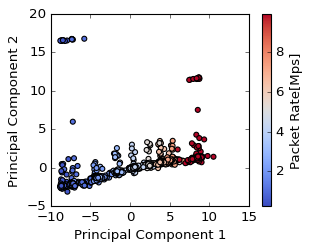

In [54]:
#spca

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')


# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_global.csv"
file_path = os.path.abspath(os.path.join("..\\tree\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
dependent_variable = df[target_col].div(1000)
independent_variables = df.drop(target_col, axis=1)
print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
spca = SparsePCA(n_components=5, alpha =1)

# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)
independent_variables_pca = spca.transform(independent_variables_scaled)
unique_values = dependent_variable.unique()

# Define colormap 
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col].div(1000)), vmax=max(df[target_col].div(1000)))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
abs_path = os.path.join("..\\tree\\figure\\fixed_rate", "tree_spca_"+ 'load_stimulus.pdf')
plt.savefig(abs_path, bbox_inches='tight')


plt.show()

89000


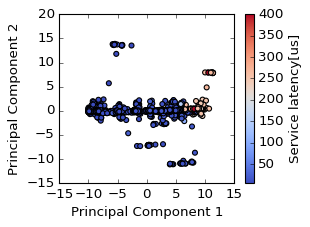

(1780, 2)
Eigenvectors:
 [[ 0.2  0.2 -0.1 -0.2 -0.1 -0.1 -0.1 -0.2 -0.1 -0.1 -0.1 -0.2 -0.1 -0.1
  -0.1 -0.2 -0.1 -0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.2  0.2 -0.  -0.
  -0.  -0.   0.2  0.2  0.2  0.2 -0.1 -0.2 -0.1 -0.1  0.2  0.1  0.1  0.1
   0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.   0.2  0.   0.  -0.3  0.2  0.   0.  -0.3  0.3  0.   0.  -0.3
   0.3  0.   0.  -0.3  0.  -0.   0.   0.   0.  -0.   0.   0.   0.3  0.
   0.  -0.4  0.  -0.   0.   0.   0.2  0.   0.  -0.3  0.  -0.   0.   0.
  -0.  -0.  -0.  -0.   0.  -0.   0.   0. ]]
Eigenvalues:
 [35.9  4. ]


In [55]:
# latency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')

# Load CSV data
current_dir = os.getcwd()
exp_ls_csv  = "load_stimulus_global.csv"
file_path = os.path.abspath(os.path.join("..\\tree\\datasets", exp_ls_csv))
df = pd.read_csv(file_path, index_col=0)
df = data.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'latency'
independent_variables = df.drop(target_col, axis=1)
dependent_variable = df[target_col]

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))

# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=400)# max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Service latency[us]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
plt.tight_layout()
abs_path = os.path.join("..\\tree\\figure\\fixed_rate", "tree_spca_latency_"+ 'load_stimulus.pdf')
plt.savefig(abs_path, bbox_inches='tight')
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
print(np.shape(independent_variables_pca))
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))

